# Montevideo

Instance took from the set of bycicle network design problems faced by Inco.

In [3]:
from functools import partial
import os

from matplotlib import pyplot as plt

import bcnetwork as bc

## Utils

In [4]:
data_path = '../data/montevideo_v2'

## Draw solutions

Draw solutions computed by the CPLEX solver elsewhere.


In [5]:
instances = []

runtime_map = {
    'montevideo_d5000.0_inv_logit_1.6_budget_factor': 1008.4,
    'montevideo_d5000.0_inv_logit': 3341.77,
    'montevideo_d5000.0_linear_1.6_budget_factor': 1135.72,
    'montevideo_d5000.0_linear': 4269.15,
}

for entry in os.scandir(data_path):
    if 'sol' in entry.path or not entry.path.endswith('pkl'):
        continue
    
    instance_name, _ = os.path.splitext(entry.path)
    solution_path = f'{instance_name}.sol.pkl'
    if not os.path.exists(solution_path):
        continue

    model = bc.model.Model.load(entry.path)
    solution = bc.solution.Solution.load(solution_path)
        
    instances.append((model, solution))

In [47]:
draw_config = dict(
    figsize=(15, 12),
)

split_draw_config = dict()


def draw_demand_weight(
    ax,
    model,
    origin_color='blue',
    destination_color='red',
    circle_factor=100,
    alpha=0.1,
):
    """
    Draw circles based on demand.
    """
    _, _, demands = zip(*model.odpairs)
    max_demand = max(demands)
    min_demand = min(demands)
    
    def get_factor(demand):
        factor = demand / (max_demand - min_demand) 
        return circle_factor ** 2 * factor ** 2

    scatter = partial(ax.scatter, alpha=alpha)
    
    for orig, dest, demand in model.odpairs:
        size = get_factor(demand)

        if origin_color:
            x, y = model.graph.nodes[orig]['pos']
            ax.scatter(x=x, y=y, color=origin_color, alpha=alpha, s=size)
        if destination_color:
            x, y = model.graph.nodes[dest]['pos']
            ax.scatter(x=x, y=y, color=destination_color, alpha=alpha, s=size)

In [ ]:
sample_model = instances[0][0]
sample_graph = sample_model.graph

print(f'Sample Model out of', len(instances), 'models')
print(f'Nodes: {sample_graph.number_of_nodes()}')
print(f'Edges: {sample_graph.number_of_edges()}')
print(f'Multigraph: {sample_graph.is_multigraph()}')
print(f'Directed: {sample_graph.is_directed()}')
print(f'OD count: {len(sample_model.odpairs)}')
print(f'Breakpoint count: {len(sample_model.breakpoints)}')
print(f'Budget: {sample_model.budget}')

fig, axs = plt.subplots(nrows=1, ncols=2)
bc.draw.draw(sample_model, odpairs=False, ax=axs[0], **split_draw_config)
draw_demand_weight(axs[0], sample_model, destination_color=None)

bc.draw.draw(sample_model, odpairs=False, ax=axs[1], **split_draw_config)
draw_demand_weight(axs[1], sample_model, origin_color=None)

fig.set(size_inches=(20, 10))

Sample Model out of 4 models
Nodes: 136
Edges: 636
Multigraph: False
Directed: True
OD count: 734
Breakpoint count: 10
Budget: 648440.474819427


[None]

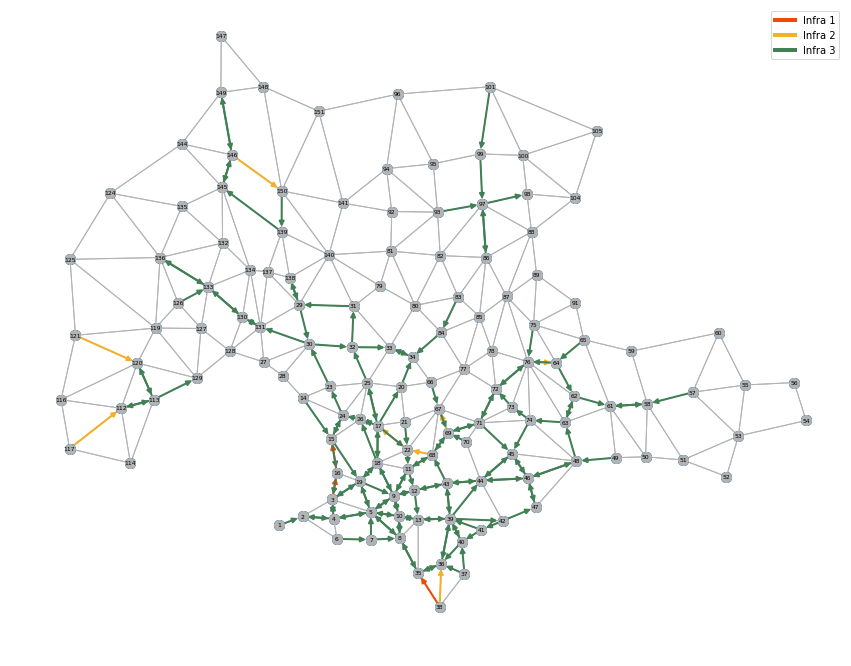

In [8]:
model, solution = instances[0]

bc.draw.draw(
    model,
    solution=solution,
    odpairs=False,
    infrastructures=True,
    figsize=(15, 12),
)

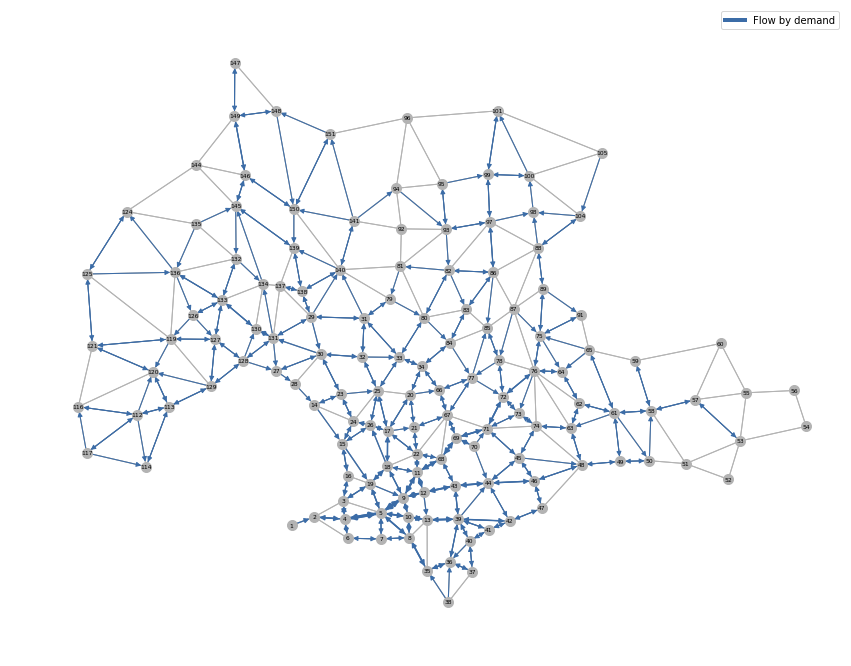

In [9]:
bc.draw.draw(
    model,
    solution=solution,
    odpairs=False,
    infrastructures=False,
    flows=True,
    figsize=(15, 12),
)

In [14]:
instances[0][0].graph.nodes['1']['pos']

(572173.4, 6136856.16)